# Input data

Text(0, 0.5, 'Second feature')

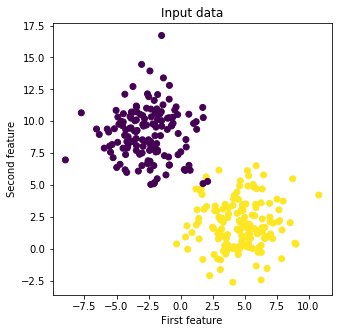

In [9]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X,y = make_blobs(n_samples = 300, random_state = 42, centers = 2, cluster_std = 2)

plt.figure(figsize=(5,5))
plt.title("Input data")
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Train and test separation

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("Shape of train data: {}".format(X_train.shape))
print("Shape of test data: {}".format(X_test.shape))

Shape of train data: (225, 2)
Shape of test data: (75, 2)


# Neural network

In [11]:
class MyNet:
    def __init__(self, n_input, n_hidden, n_output, lr = 0.1):
        
        self.learning_rate = lr
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output

        # Weights after input layer
        self.w1 = np.array([[-0.1, 0.2, 0.4], 
                            [-0.3, 0.4, -0.3]])

        # Weights before output layer
        self.w2 = np.array([[-0.4, 0.5],
                            [-0.1, 0.2],
                            [-0.3, 0.5]])  
        
    # Activation function
    def activation_function(self, data):
        return 1 / (1 + np.exp(-data))

    # Derivative of function
    def derivative_of_function(self, y):
        return y * (1 - y)    
        
    # Forward propagation function
    def forward_propagation(self, input_data):

        # Between input and hidden layer
        net_on_hidden_layer = np.dot(input_data, self.w1)
        y_on_hidden_layer = self.activation_function(net_on_hidden_layer)

        # Between hidden and output layer
        net_on_output_layer = np.dot(y_on_hidden_layer, self.w2)
        y_on_output_layer = self.activation_function(net_on_output_layer)

        return y_on_output_layer, y_on_hidden_layer

    # Neural network training
    def neural_network_training(self, input_data, y_true):

        y_on_output_layer, y_on_hidden_layer = self.forward_propagation (input_data)

        # Back propagation function (Error-Correction)
        if y_true == 0: y_true_output = [1, 0, 0] 
        elif y_true == 1: y_true_output = [0, 1, 0] 
        else: y_true_output = [0, 0, 1] 

        d_output = y_true - y_on_output_layer
        d_hidden = np.dot(d_output,np.transpose(self.w2))

        self.w1 = self.w1 + d_hidden * self.derivative_of_function(y_on_hidden_layer) * input_data.reshape(self.n_input,1) * self.learning_rate 
        self.w2 = self.w2 + d_output * self.derivative_of_function(y_on_output_layer) * y_on_hidden_layer.reshape(self.n_hidden,1) * self.learning_rate 
    
        return y_on_output_layer

# Neural network training

In [12]:
num_epoch = 100
net = MyNet(2, 3, 2, 0.01)
for i in range(0, num_epoch, 1):
    acc_train = 0
    for j in range(0, len(y_train), 1):
        preds = net.neural_network_training(X_train[j], y_train[j])
        acc_train += np.argmax(preds) == y_train[j]
    acc_train = acc_train/len(y_train)      
    y_pred = []
    acc_test = 0
    for k in range(0, len(y_test), 1):
        answer,_ = net.forward_propagation(X_test[k])
        y_pred.append(np.argmax(answer))
        acc_test += np.argmax(answer) == y_test[k]
    acc_test = acc_test/len(y_test)
    if i % 10 == 0:
        print('Epoch: {} train accuracy: {:.3f}% test accuracy: {:.3f}%'.format(i, acc_train, acc_test))   
        
y_pred = []
for k in range(0, len(y_test), 1):
    answer,_ = net.forward_propagation(X_test[k])
    y_pred.append(np.argmax(answer))
    
print("ОК!")

Epoch: 0 train accuracy: 0.502% test accuracy: 0.493%
Epoch: 10 train accuracy: 0.987% test accuracy: 0.960%
Epoch: 20 train accuracy: 0.982% test accuracy: 0.960%
Epoch: 30 train accuracy: 0.987% test accuracy: 0.960%
Epoch: 40 train accuracy: 0.991% test accuracy: 0.973%
Epoch: 50 train accuracy: 0.996% test accuracy: 0.973%
Epoch: 60 train accuracy: 0.996% test accuracy: 0.973%
Epoch: 70 train accuracy: 0.996% test accuracy: 0.973%
Epoch: 80 train accuracy: 0.996% test accuracy: 0.987%
Epoch: 90 train accuracy: 0.996% test accuracy: 0.987%
ОК!


# Results

Text(0, 0.5, 'Second feature')

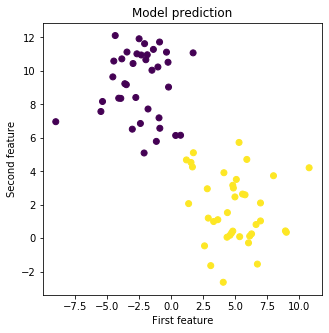

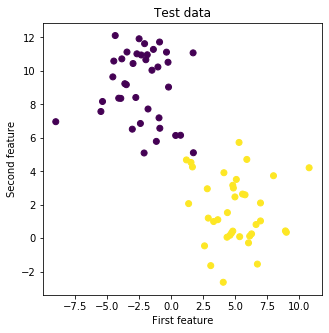

In [13]:
plt.figure(figsize=(5,5))
plt.title("Model prediction")
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred)
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.figure(figsize=(5,5))
plt.title("Test data")
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")